   age  sex  cp   trestbps  chol  fbs   restecg   thalach   exang   oldpeak  \
0   63    1   3        145   233    1         0       150       0       2.3   
1   37    1   2        130   250    0         1       187       0       3.5   
2   41    0   1        130   204    0         0       172       0       1.4   
3   56    1   1        120   236    0         1       178       0       0.8   
4   57    0   0        120   354    0         1       163       1       0.6   

    slope   ca   thal   target  
0       0    0      1        1  
1       0    0      2        1  
2       2    0      2        1  
3       2    0      2        1  
4       2    0      2        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   cp         303 non-null    int64  
 3    trestbps  303 no

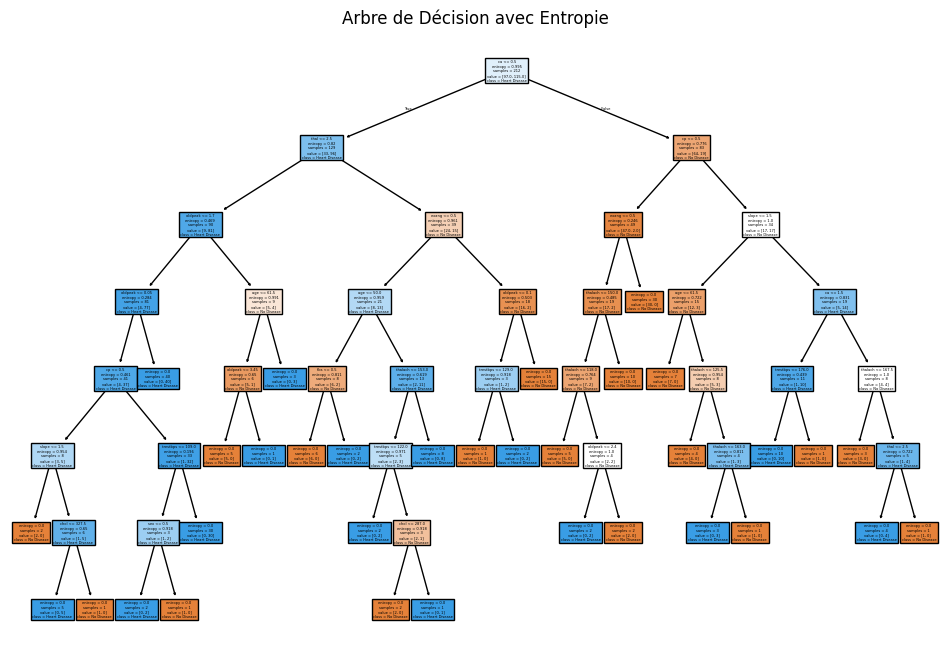

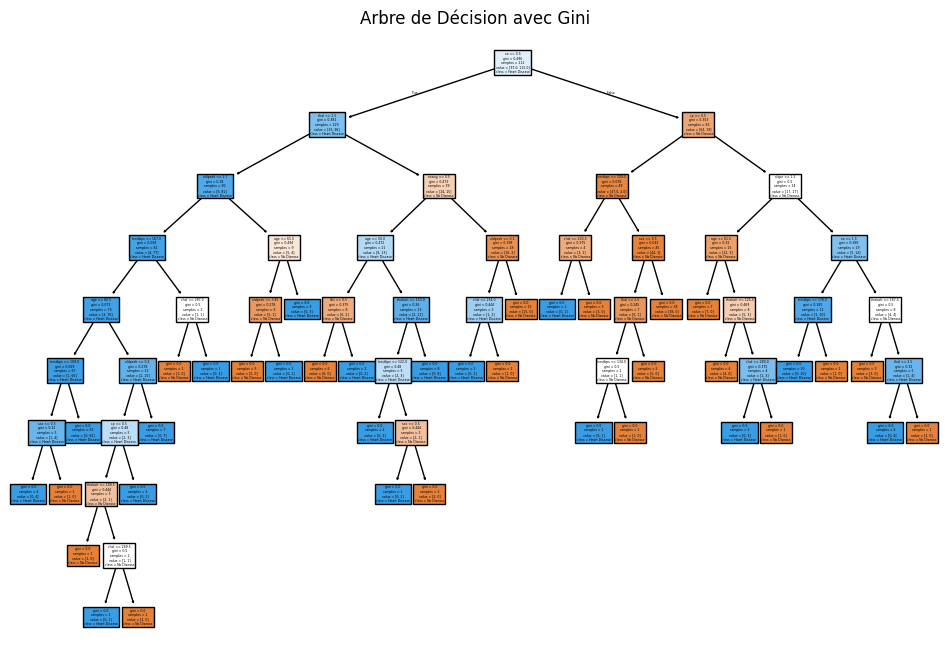

In [ ]:
import pandas as pd

# Charger le dataset
df = pd.read_csv("heart.csv")

# Afficher les premières lignes pour vérifier le contenu
print(df.head())
# Afficher un résumé des données
print(df.info())

# Afficher les premières lignes des données
print(df.head())
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Nettoyer les noms de colonnes (supprimer les espaces avant et après)
df.columns = df.columns.str.strip()

# Vérifier si 'target' est dans les colonnes après nettoyage
if 'target' in df.columns:
    print("La colonne 'target' existe bien dans le DataFrame.")
else:
    print("La colonne 'target' n'existe pas. Voici les colonnes disponibles :", df.columns)
    # Si 'target' n'existe pas, vous devrez peut-être corriger le nom de la colonne cible
    # ou ajuster votre code en conséquence.

# Séparer les caractéristiques (X) et la variable cible (y)
# Séparer les caractéristiques (X) et la variable cible (y)
X = df.drop('target', axis=1)
y = df['target']


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer un modèle d'arbre de décision avec entropie
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_entropy.fit(X_train, y_train)

# Prédictions
y_pred_entropy = model_entropy.predict(X_test)

# Afficher les résultats
print(f"Modèle avec entropie (gain d'information) - Score sur l'ensemble de test: {model_entropy.score(X_test, y_test)}")
# Créer un modèle d'arbre de décision avec l'indice de Gini
model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini.fit(X_train, y_train)

# Prédictions
y_pred_gini = model_gini.predict(X_test)

# Afficher les résultats
print(f"Modèle avec indice de Gini - Score sur l'ensemble de test: {model_gini.score(X_test, y_test)}")
from sklearn.metrics import accuracy_score

# Calculer la précision des deux modèles
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Afficher les résultats
print(f"Précision du modèle avec entropie: {accuracy_entropy}")
print(f"Précision du modèle avec Gini: {accuracy_gini}")
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualiser l'arbre de décision basé sur l'entropie
plt.figure(figsize=(12, 8))
plot_tree(model_entropy, filled=True, feature_names=X.columns, class_names=['No Disease', 'Heart Disease'])
plt.title("Arbre de Décision avec Entropie")
plt.show()

# Visualiser l'arbre de décision basé sur l'indice de Gini
plt.figure(figsize=(12, 8))
plot_tree(model_gini, filled=True, feature_names=X.columns, class_names=['No Disease', 'Heart Disease'])
plt.title("Arbre de Décision avec Gini")
plt.show()

# Ce script applique des arbres de décision avec entropie et Gini sur un dataset cardiaque.  
# Les modèles sont entraînés et évalués en termes de précision sur un ensemble de test.  
# Enfin, les arbres sont visualisés pour interpréter les décisions prises par les modèles.  
